## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Year vs Temperature Change
#### 4. Year vs Natural Events
#### 5. Year vs Carbon emissions
#### 6. Migration vs Temperature Change
#### 7. Number of events vs Migration
#### 8. Carbon Emissions vs Temperature Change

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/Juliana/Documents/DATA ANALYTICS COURSE/IMMERSION/6/'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Merged Data','merged_data_clean.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Country_Code', 'Region', 'Continent',
       'Number_of_Events', 'Temp_Change_AVG', 'Net_Migration', 'Population',
       'Carbon_Emissions', 'Energy_Consumption'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Year,Country,Country_Code,Region,Continent,Number_of_Events,Temp_Change_AVG,Net_Migration,Population,Carbon_Emissions,Energy_Consumption
0,0,1965,Indonesia,IDN,South-Eastern Asia,Asia,1.0,0.290833,-61146.0,100267062.0,24689.911,84.51602
1,1,1965,Argentina,ARG,South America,Americas,1.0,0.849750,33973.0,22159650.0,58866.351,328.52762
2,2,1965,Bangladesh,BGD,Southern Asia,Asia,3.0,0.387833,47618.0,55385112.0,19974.149,NaN
3,5,1965,Bulgaria,BGR,Eastern Europe,Europe,1.0,1.321500,1838.0,8204168.0,46317.877,119.92565
4,6,1965,Bahamas (the),BHS,Caribbean,Americas,1.0,0.328250,2493.0,140059.0,1316.453,NaN


In [7]:
df.shape

(9134, 12)

In [8]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0','Region', 'Continent'], inplace=True)

In Exercise 6.2, the variables that appear interesting for further exploration are Year, Temperature Changes, Net Migration, Number of Events, and Carbon Emissions.. For the initial data analysis, given that it encompasses data from nearly every country spanning the years 1965-2022, the decision is made to aggregate the data by year, making it more straightforward to explore potential relationships between the variables on a global level

In [17]:
# Group  by 'Year', then calculate the total number of events for each one
df['Events_Year'] = df.groupby(['Year'])['Number_of_Events'].transform('sum')

In [18]:
# Group by 'Year', then calculate the average temperature change for each one
df['Global_Temp'] = df.groupby(['Year'])['Temp_Change_AVG'].transform('mean')

In [19]:
# Group nat_disasters by 'Year', then calculate the total amount of carbon emissions for each one
df['Net_Migration_Sum'] = df.groupby(['Year'])['Net_Migration'].transform('sum')

In [20]:
# Group nat_disasters by 'Year', then calculate the total amount of carbon emissions for each one
df['CO2Emissions_Year'] = df.groupby(['Year'])['Carbon_Emissions'].transform('sum')

In [21]:
# Group by 'Year' and calculate the sum of absolute values of 'net_migration'
df['Migration_ABS'] = df.groupby('Year')['Net_Migration'].transform(lambda x: x.abs().sum())

##### Missing values

In [22]:
# Check for missing values

df.isnull().sum()

# there amount of missing values is insignificant

Year                     0
Country                  0
Country_Code             0
Number_of_Events         0
Temp_Change_AVG         39
Net_Migration          185
Population             659
Carbon_Emissions       560
Energy_Consumption    1590
Events_Year              0
Global_Temp              0
Net_Migration_Sum        0
CO2Emissions_Year        0
Migration_ABS            0
dtype: int64

##### Duplicates check

In [23]:
dups = df.duplicated()

In [24]:
dups.shape # No dups

(9134,)

### 3. Year vs Temperature Change

Hypothesis: Temperature will increase over time.

#### Extreme values check

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\3678804032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Temp'], bins=25)


<Axes: xlabel='Global_Temp', ylabel='Density'>

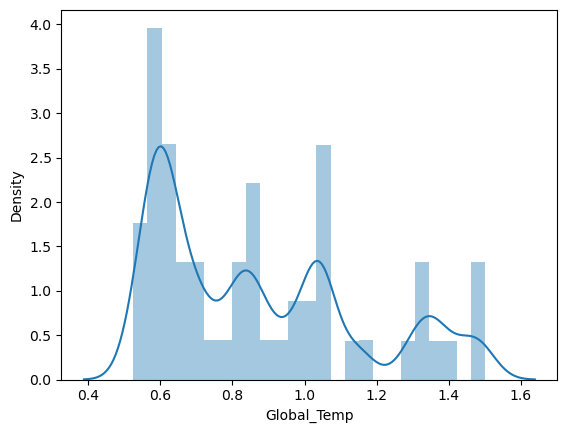

In [25]:
sns.distplot(df['Global_Temp'], bins=25) 

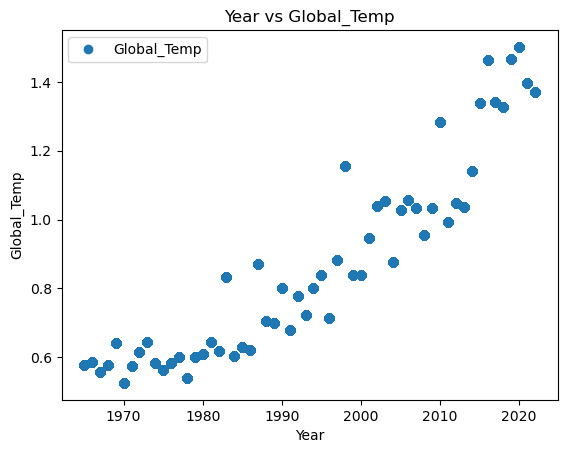

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Global_Temp',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs Global_Temp')  
plt.xlabel('Year')  
plt.ylabel('Global_Temp')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Global_Temp'].values.reshape(-1,1)

In [28]:
X

array([[1965],
       [1965],
       [1965],
       ...,
       [2022],
       [2022],
       [2022]], dtype=int64)

In [29]:
y

array([[0.5765227 ],
       [0.5765227 ],
       [0.5765227 ],
       ...,
       [1.37040855],
       [1.37040855],
       [1.37040855]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [31]:
# Create a regression object.

regression_year_temp = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression_year_temp.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression_year_temp.predict(X_test)

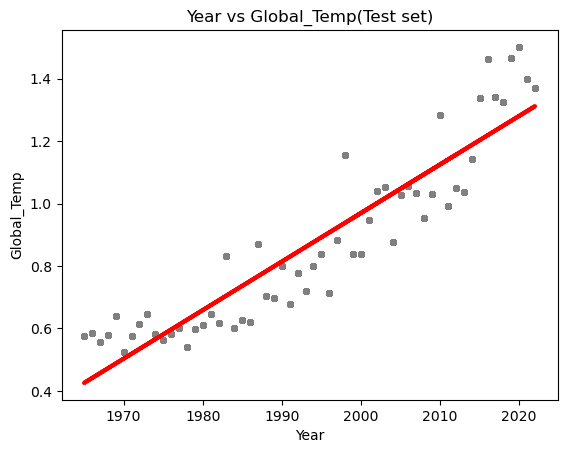

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs Global_Temp(Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Global_Temp')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.
# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_year_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01554905]]
Mean squared error:  0.01240955620496574
R2 score:  0.8447658301148663


In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,0.839314,0.954318
1,1.040609,1.000965
2,0.721635,0.861024
3,0.610351,0.658886
4,1.463982,1.218652


#### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression_year_temp.predict(X_train) 

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression_year_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01554905]]
Mean squared error:  0.01232096575920121
R2 score:  0.8461384792341464


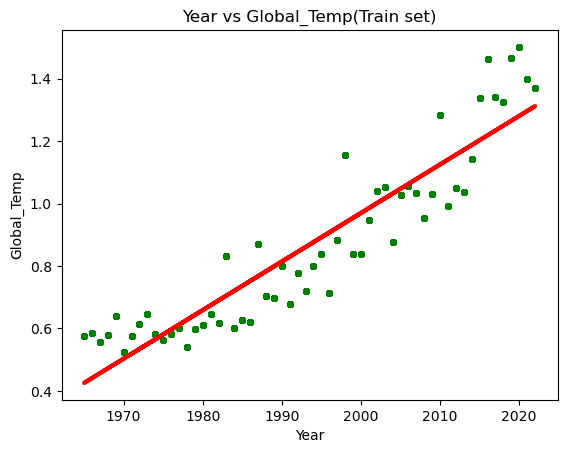

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs Global_Temp(Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Global_Temp')
plot_test.show()

Comment:

- The positive slope coefficient suggests that, on average, global temperature has increased through the years. Both the test and training datasets yield similar slope coefficients, indicating consistency in the relationship between 'Year' and 'Global Temperature Change'

- The mean squared error (MSE) for both the test and training datasets is relatively low (~0.011), indicating that the model's predictions are close to the actual values. Additionally, the R2 score (0.82) suggests that the model is a great fit.

### 4. Year vs Natural Events 

Hypothesis: The number of natural disasters/events has increased over time.

##### Extreme values checks

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\663874289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Events_Year'], bins=25)


<Axes: xlabel='Events_Year', ylabel='Density'>

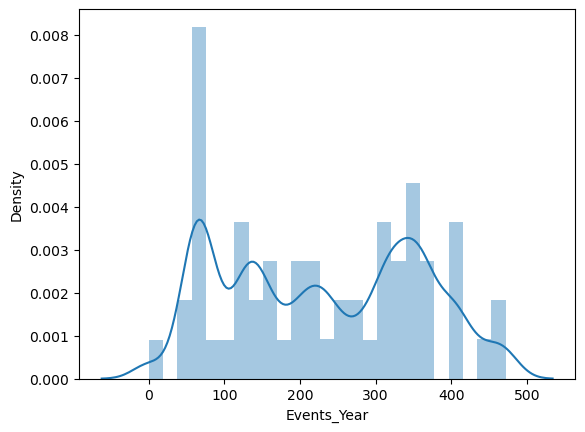

In [42]:
sns.distplot(df['Events_Year'], bins=25) 

In [43]:
df['Events_Year'].mean() # Check the mean

230.0262754543464

In [44]:
df['Events_Year'].median() # Check the median

226.0

In [45]:
df['Events_Year'].max() # Check the max

472.0

#### Data prep for regression analysis 

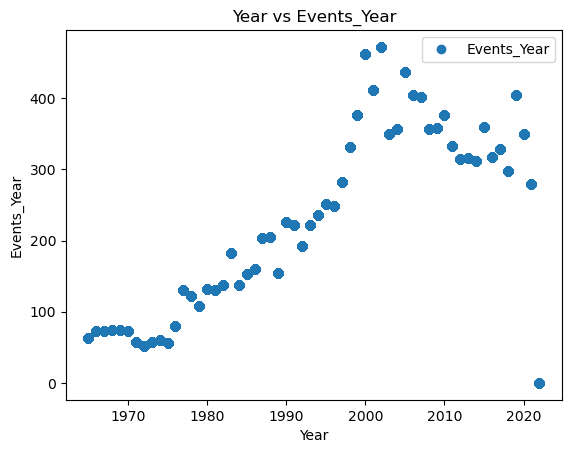

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Events_Year',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs Events_Year')  
plt.xlabel('Year')  
plt.ylabel('Events_Year')  
plt.show()

In [47]:
# Remove the rows with extreme values from the "Year" variable, as there is no data available for the years 2022 onward

df = df[df['Year'] <=2021] 

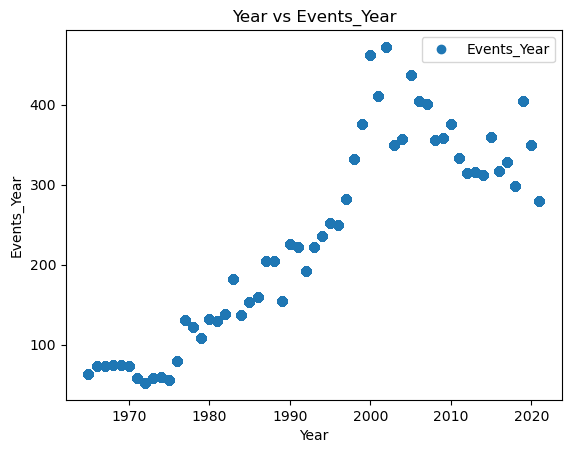

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Events_Year',style='o') 
plt.title('Year vs Events_Year')  
plt.xlabel('Year')  
plt.ylabel('Events_Year')  
plt.show()

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Events_Year'].values.reshape(-1,1)

In [51]:
X

array([[1965],
       [1965],
       [1965],
       ...,
       [2021],
       [2021],
       [2021]], dtype=int64)

In [52]:
y

array([[ 63.],
       [ 63.],
       [ 63.],
       ...,
       [280.],
       [280.],
       [280.]])

In [53]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis

In [54]:
# Create a regression object.

regression_year_events = LinearRegression() 

In [55]:
# Fit the regression object onto the training set.

regression_year_events.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression_year_events.predict(X_test)

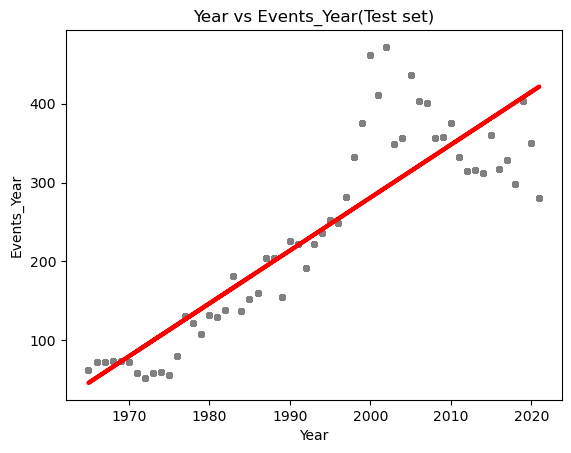

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs Events_Year(Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Events_Year')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_year_events.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.70978656]]
Mean squared error:  3565.149907432758
R2 score:  0.7762877699683429


In [60]:
y_predicted

array([[180.19436941],
       [133.2258635 ],
       [173.48458285],
       ...,
       [ 66.1279979 ],
       [ 45.99863822],
       [ 86.25735758]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,153.0,180.194369
1,122.0,133.225863
2,137.0,173.484583
3,360.0,381.487966
4,52.0,92.967144


#### Compare how the regression fits the training set

In [62]:
# Predict.

y_predicted_train = regression_year_events.predict(X_train)

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression_year_events.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.70978656]]
Mean squared error:  3606.9598853374596
R2 score:  0.771093716588394


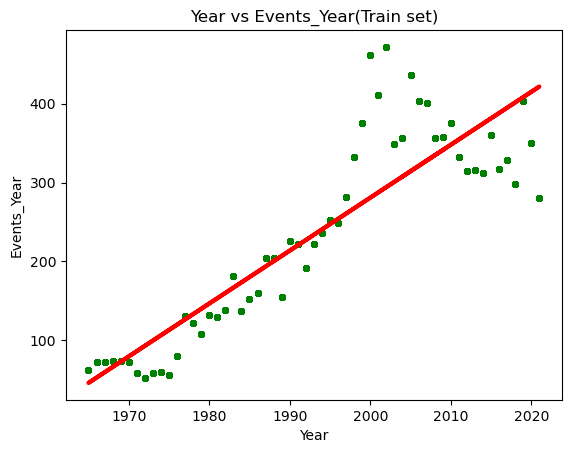

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs Events_Year(Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Events_Year')
plot_test.show()

#### Performance improvement after removing outliers

In [66]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Events_Year'] <=450] 

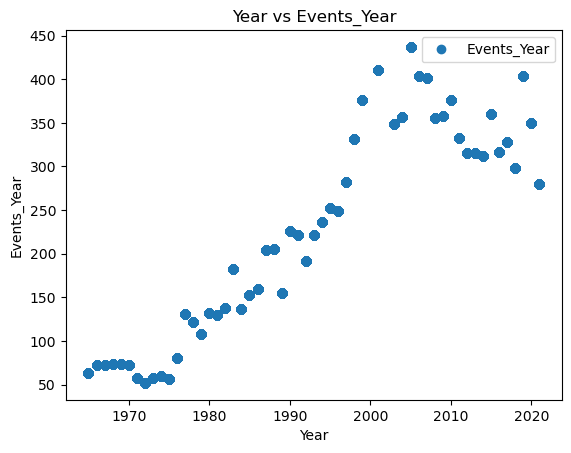

In [67]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year', y='Events_Year', style='o')  
plt.title('Year vs Events_Year')  
plt.xlabel('Year')  
plt.ylabel('Events_Year')  
plt.show()

In [68]:
# Reshape again.

X_2 = df_test['Year'].values.reshape(-1,1)
y_2 = df_test['Events_Year'].values.reshape(-1,1)

In [69]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [70]:
# Run and fit the regression.

regression_year_events = LinearRegression()  
regression_year_events.fit(X_train_2, y_train_2)

LinearRegression()

In [71]:
# Predict.

y_predicted_2 = regression_year_events.predict(X_test_2)

In [72]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [73]:
print('Slope:' ,regression_year_events.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.52336053]]
Mean squared error:  2503.459781746507
R2 score:  0.8261676577847901


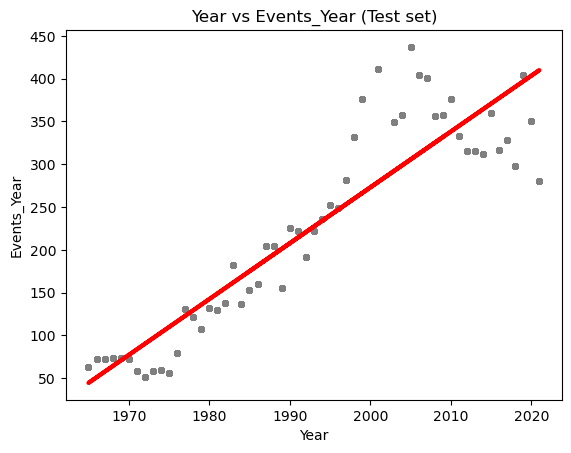

In [74]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Year vs Events_Year (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Events_Year')
plot_test.show()

In [75]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head()

,Actual,Predicted
0,153.0,175.049594
1,280.0,409.890573
2,74.0,70.675825
3,222.0,227.236478
4,376.0,338.133607


Comment:
- The test data showed a positive relationship between 'Year' and the 'Number of Natural Disasters/Events,' with a slope that suggests an average increase of 7.28 natural disasters/events per year. However, the model exhibited a relatively high MSE , meaning significant deviation between predicted and actual values. The R2 demonstrated the moder is a good fit.
- After removing the outliers, the model's accuracy improved. The slope coefficient remained consistent but the MSE notably reduced , signifying a closer alignment between predicted and actual values. The fit of the model also improved.

### 5. Year vs Carbon emissions

Hypothesis: The amount of carbon emissions and energy consumption has increased year by year

#### Extreme values check

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\930499518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2Emissions_Year'], bins=25)


<Axes: xlabel='CO2Emissions_Year', ylabel='Density'>

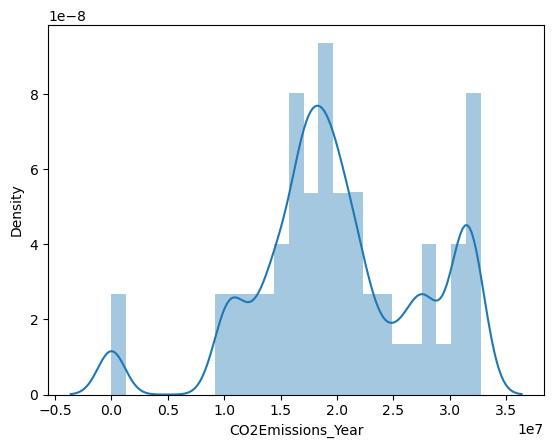

In [76]:
sns.distplot(df['CO2Emissions_Year'], bins=25) 

In [77]:
df['CO2Emissions_Year'].mean() # Check the mean

20172276.598086745

In [78]:
df['CO2Emissions_Year'].median() # Check the median

19163789.993

In [79]:
df['CO2Emissions_Year'].max() # Check the max

32769499.96338785

#### Data prep for regression analysis

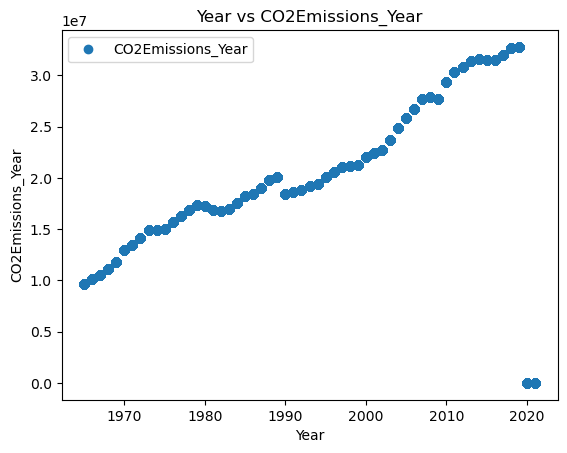

In [80]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='CO2Emissions_Year',style='o')
plt.title('Year vs CO2Emissions_Year')  
plt.xlabel('Year')  
plt.ylabel('CO2Emissions_Year')  
plt.show()


In [81]:
# Delete rows where the 'Year' variable is equal to 2020
df = df[df['Year'] < 2020]

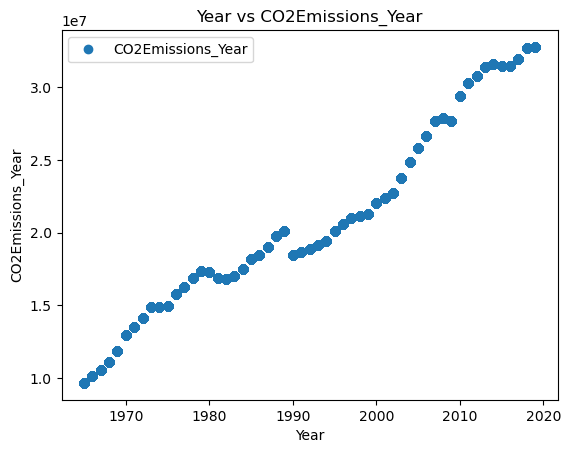

In [82]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='CO2Emissions_Year',style='o')
plt.title('Year vs CO2Emissions_Year')  
plt.xlabel('Year')  
plt.ylabel('CO2Emissions_Year')  
plt.show()


In [83]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['CO2Emissions_Year'].values.reshape(-1,1)

In [84]:
X

array([[1965],
       [1965],
       [1965],
       ...,
       [2019],
       [2019],
       [2019]], dtype=int64)

In [85]:
y

array([[ 9653590.186     ],
       [ 9653590.186     ],
       [ 9653590.186     ],
       ...,
       [32769499.96338785],
       [32769499.96338785],
       [32769499.96338785]])

In [86]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis

In [87]:
# Create a regression object.

regression_year_co2 = LinearRegression()  

In [88]:
# Fit the regression object onto the training set.

regression_year_co2.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict the values of y using X.

y_predicted = regression_year_co2.predict(X_test)

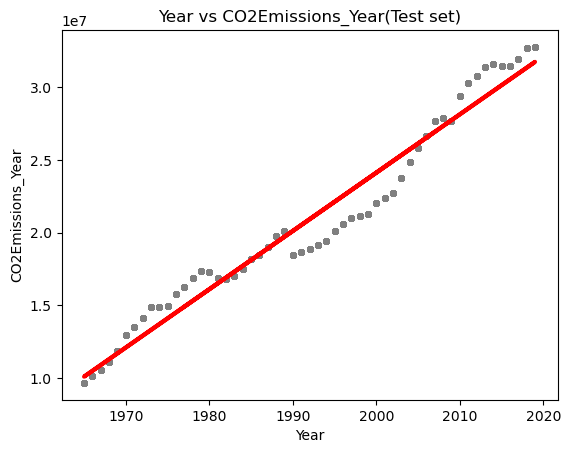

In [90]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs CO2Emissions_Year(Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('CO2Emissions_Year')
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [92]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_year_co2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[401018.07396261]]
Mean squared error:  1866559689900.537
R2 score:  0.9554516675696927


In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,1.626793e+07,1.489762e+07
1,1.944522e+07,2.171492e+07
2,1.183130e+07,1.168947e+07
3,1.488713e+07,1.369456e+07
4,2.787791e+07,2.732918e+07


#### Compare how the regression fits the training set

In [94]:
# Predict.

y_predicted_train = regression_year_co2.predict(X_train) 

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print('Slope:' ,regression_year_co2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[401018.07396261]]
Mean squared error:  1852007936380.7424
R2 score:  0.956277010023946


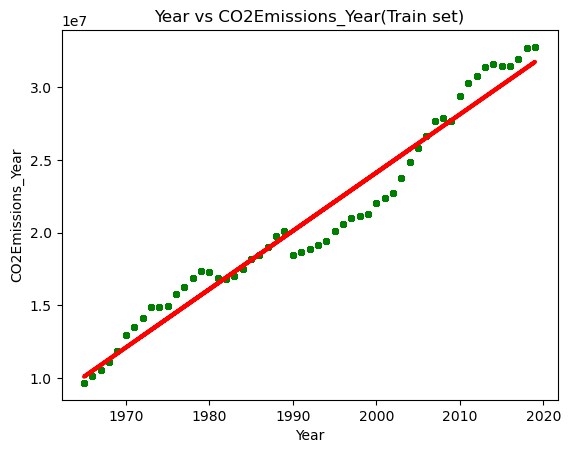

In [97]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs CO2Emissions_Year(Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('CO2Emissions_Year')
plot_test.show()

Comment:
- The regression on the  data displayed a positive relationship between 'Year' and 'CO2 Emissions per Year,' with a substantial slope coefficient. This indicates a significant increase in CO2 emissions yearly. The relatively high mean squared error (MSE) indicates a notable difference between predicted and actual CO2 emission values, reflecting the model's limitations in predicting the emissions based solely on the year variable.


### 6. Migration  vs Temperature Change

Hypothesis: Changes in temperature alone may not be the sole driving factor behind shifts in migration patterns


#### Extreme Values check

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\1660896477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Migration_ABS'], bins=25)


<Axes: xlabel='Migration_ABS', ylabel='Density'>

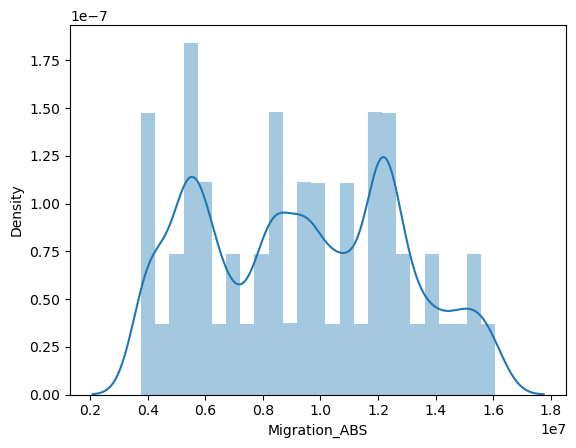

In [98]:
sns.distplot(df['Migration_ABS'], bins=25) 

#### Data prep for regression analysis

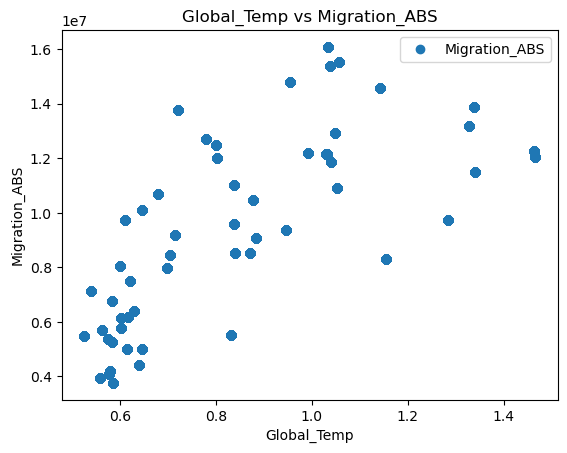

In [99]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Global_Temp', y='Migration_ABS',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Global_Temp vs Migration_ABS')  
plt.xlabel('Global_Temp')  
plt.ylabel('Migration_ABS')  
plt.show()

In [100]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Global_Temp'].values.reshape(-1,1)
y = df['Migration_ABS'].values.reshape(-1,1)

In [101]:
X

array([[0.5765227 ],
       [0.5765227 ],
       [0.5765227 ],
       ...,
       [1.46532797],
       [1.46532797],
       [1.46532797]])

In [102]:
y

array([[ 4104062.],
       [ 4104062.],
       [ 4104062.],
       ...,
       [12041089.],
       [12041089.],
       [12041089.]])

In [103]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis

In [104]:
# Create a regression object.

regression_mig_temp = LinearRegression()  

In [105]:
# Fit the regression object onto the training set.

regression_mig_temp.fit(X_train, y_train)

LinearRegression()

In [106]:
# Predict the values of y using X.

y_predicted = regression_mig_temp.predict(X_test)

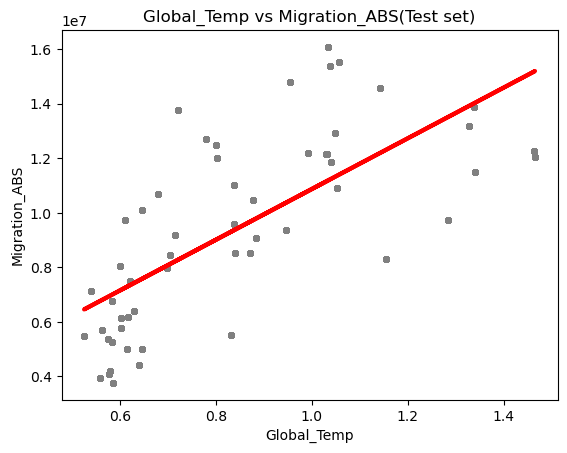

In [107]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Global_Temp vs Migration_ABS(Test set)')
plot_test.xlabel('Global_Temp')
plot_test.ylabel('Migration_ABS')
plot_test.show()

In [108]:
# Create objects that contain the model summary statistics.

# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [109]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_mig_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9289258.46614567]]
Mean squared error:  5777368268948.823
R2 score:  0.5098708899543742


In [110]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,5784516.0,7.161886e+06
1,12013031.0,9.025578e+06
2,4421334.0,7.523043e+06
3,5275441.0,7.000932e+06
4,14781942.0,1.044988e+07


#### Compare how the regression fits the training set

In [111]:
# Predict.

y_predicted_train = regression_mig_temp.predict(X_train) # This is predicting X_train!

In [112]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [113]:
print('Slope:' ,regression_mig_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9289258.46614567]]
Mean squared error:  5920809056763.779
R2 score:  0.49467104522244587


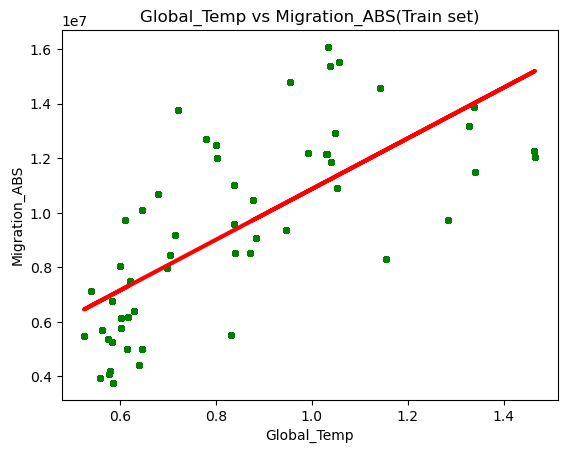

In [114]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Global_Temp vs Migration_ABS(Train set)')
plot_test.xlabel('Global_Temp')
plot_test.ylabel('Migration_ABS')
plot_test.show()

Comment:
- The regression analysis on the test data demonstrated a positive relationship between Temperature Change per Year and Migration, with a substantial slope coefficient that indicates that migration increases significantly with the rise in temperature each year. However, the relatively high mean squared error points to a substantial deviation between predicted and actual migration values. The R2 value of 0.27 signifies that only 27% of the variance in migration can be explained by Temperature Change per Year in the test dataset. This suggests that while there is a correlation, other factors not considered in the model are likely influencing migration patterns.


### 7. Number of events vs Migration

Hypothesis: Regions with moderate to high frequencies of natural disasters are more likely to experience notable migration patterns

#### Extreme Values Check

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\63184586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Migration_ABS'], bins=25)


<Axes: xlabel='Migration_ABS', ylabel='Density'>

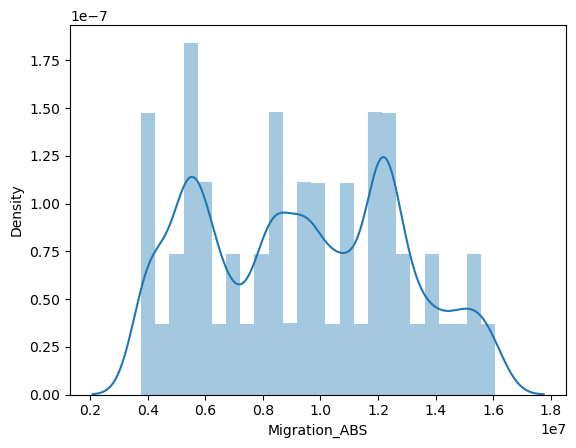

In [115]:
sns.distplot(df['Migration_ABS'], bins=25)

#### Data prep for regression analysis

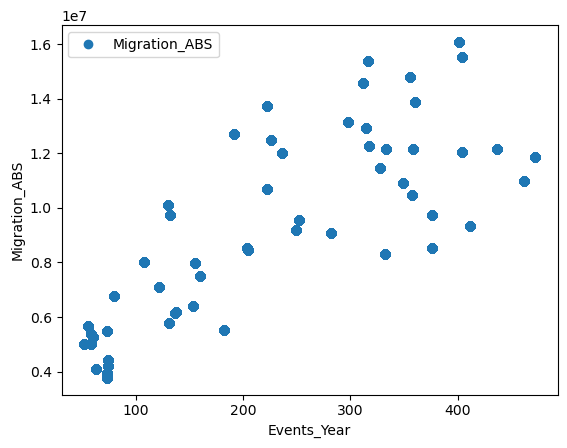

In [116]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Events_Year', y='Migration_ABS',style='o')
plt.xlabel('Events_Year')  
plt.ylabel('Migration_ABS')  
plt.show()

In [117]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Events_Year'].values.reshape(-1,1)
y = df['Migration_ABS'].values.reshape(-1,1)

In [118]:
X

array([[ 63.],
       [ 63.],
       [ 63.],
       ...,
       [404.],
       [404.],
       [404.]])

In [119]:
y

array([[ 4104062.],
       [ 4104062.],
       [ 4104062.],
       ...,
       [12041089.],
       [12041089.],
       [12041089.]])

In [120]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####  Regression analysis

In [121]:
# Create a regression object.

regression_events_mig = LinearRegression()

In [122]:
# Fit the regression object onto the training set.

regression_events_mig.fit(X_train, y_train)

LinearRegression()

In [123]:
# Predict the values of y using X.

y_predicted = regression_events_mig.predict(X_test)

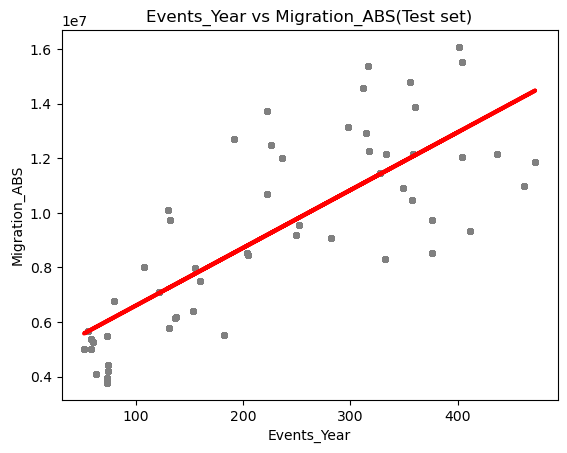

In [124]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Events_Year vs Migration_ABS(Test set)')
plot_test.xlabel('Events_Year')
plot_test.ylabel('Migration_ABS')
plot_test.show()


In [125]:
# Create objects that contain the model summary statistics.

# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [126]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_events_mig.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[21185.14072915]]
Mean squared error:  4526827595192.244
R2 score:  0.6159618225332125


In [127]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,5784516.0,7.254770e+06
1,12013031.0,9.479210e+06
2,4421334.0,6.047217e+06
3,5275441.0,5.750625e+06
4,14781942.0,1.202143e+07


#### Compare how the regression fits the training set

In [128]:
# Predict.

y_predicted_train = regression_events_mig.predict(X_train) 

In [129]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [130]:
print('Slope:' ,regression_events_mig.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[21185.14072915]]
Mean squared error:  4544478990278.982
R2 score:  0.6121380040886778


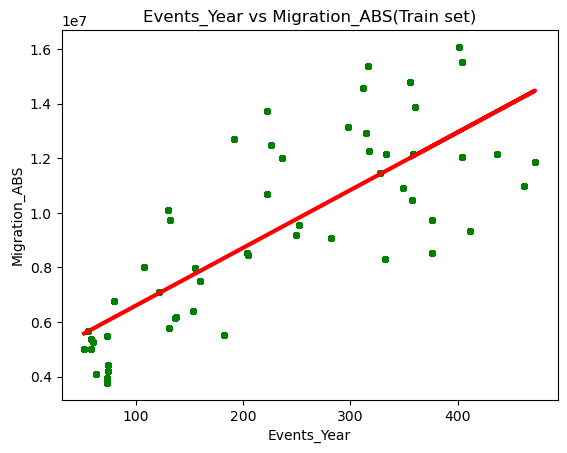

In [131]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Events_Year vs Migration_ABS(Train set)')
plot_test.xlabel('Events_Year')
plot_test.ylabel('Migration_ABS')
plot_test.show()

Comment:
- The analysis highlights a positive correlation between Natural Disasters per Year and Migration, indicating that an increase in natural disasters tends to coincide with higher migration numbers. However, the model's limitations are evident in the relatively high MSE and the inability to capture all factors influencing migration accurately. The R2 scores, while moderate, indicate that a substantial portion of the variance in migration can be attributed to natural disasters, but other unaccounted variables likely play significant roles.

### 8. Carbon Emissions vs Temperature Change

Hypothesis: High carbon emissions and energy consumption may not directly impact local temperature changes

#### Extreme Values Check

C:\Users\Juliana\AppData\Local\Temp\ipykernel_13792\607850425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Temp'], bins=25)


<Axes: xlabel='Global_Temp', ylabel='Density'>

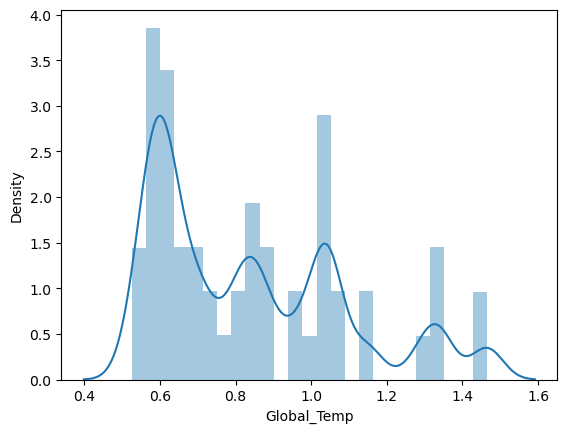

In [132]:
sns.distplot(df['Global_Temp'], bins=25)

#### Data prep for regression analysis

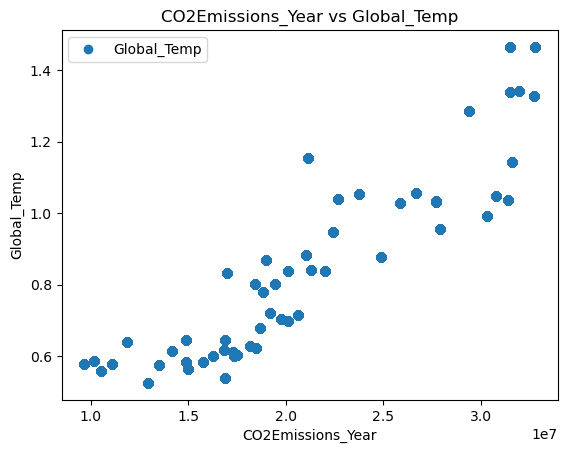

In [133]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'CO2Emissions_Year', y='Global_Temp',style='o') 
plt.title('CO2Emissions_Year vs Global_Temp')  
plt.xlabel('CO2Emissions_Year')  
plt.ylabel('Global_Temp')  
plt.show()

In [134]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['CO2Emissions_Year'].values.reshape(-1,1)
y = df['Global_Temp'].values.reshape(-1,1)

In [135]:
X

array([[ 9653590.186     ],
       [ 9653590.186     ],
       [ 9653590.186     ],
       ...,
       [32769499.96338785],
       [32769499.96338785],
       [32769499.96338785]])

In [136]:
y

array([[0.5765227 ],
       [0.5765227 ],
       [0.5765227 ],
       ...,
       [1.46532797],
       [1.46532797],
       [1.46532797]])

In [137]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [138]:
# Create a regression object.

regression_carbon_temp = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [139]:
# Fit the regression object onto the training set.

regression_carbon_temp.fit(X_train, y_train)

LinearRegression()

In [140]:
# Predict the values of y using X.

y_predicted = regression_carbon_temp.predict(X_test)

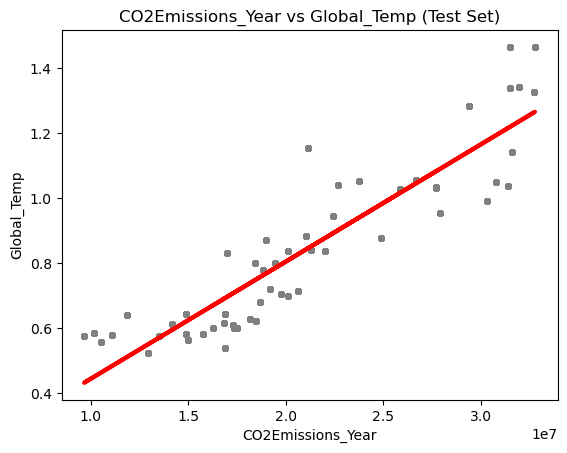

In [141]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('CO2Emissions_Year vs Global_Temp (Test Set)')
plot_test.xlabel('CO2Emissions_Year')
plot_test.ylabel('Global_Temp')
plot_test.show()

In [142]:
# Create objects that contain the model summary statistics.

# Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted)
# R2 score. 
r2 = r2_score(y_test, y_predicted) 

In [143]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_carbon_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.60315855e-08]]
Mean squared error:  0.012091476543492427
R2 score:  0.8143293400292883


In [144]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,0.600967,0.670859
1,0.801596,0.785342
2,0.639846,0.511000
3,0.583640,0.621106
4,0.954924,1.089185


#### Compare how the regression fits the training set

In [145]:
# Predict.

y_predicted_train = regression_carbon_temp.predict(X_train) 

In [146]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [147]:
print('Slope:' ,regression_carbon_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.60315855e-08]]
Mean squared error:  0.012175794358815925
R2 score:  0.8187257837688855


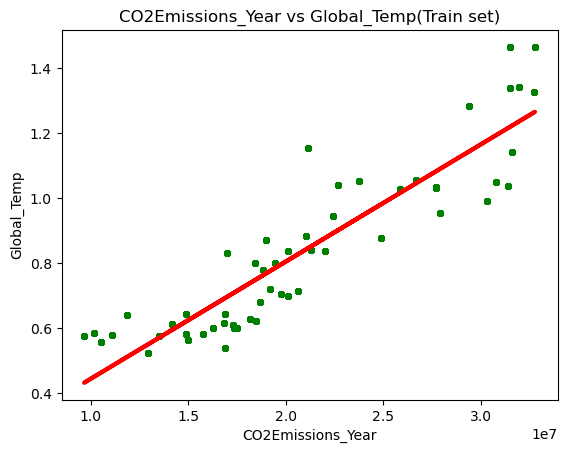

In [148]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('CO2Emissions_Year vs Global_Temp(Train set)')
plot_test.xlabel('CO2Emissions_Year')
plot_test.ylabel('Global_Temp')
plot_test.show()

#### Performance after removing outliers

In [149]:
# Clean outlier from the Global_Temp variable observed during the consistency checks.
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df['Global_Temp'].quantile(0.25)
    Q3 = df['Global_Temp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df['Global_Temp'] >= lower_bound) & (df['Global_Temp'] <= upper_bound)]
    return df_no_outliers

# Specify the column from which you want to remove outliers
column_name = 'Global_Temp'

# Remove outliers from the specified column
df = remove_outliers_iqr(df, column_name)

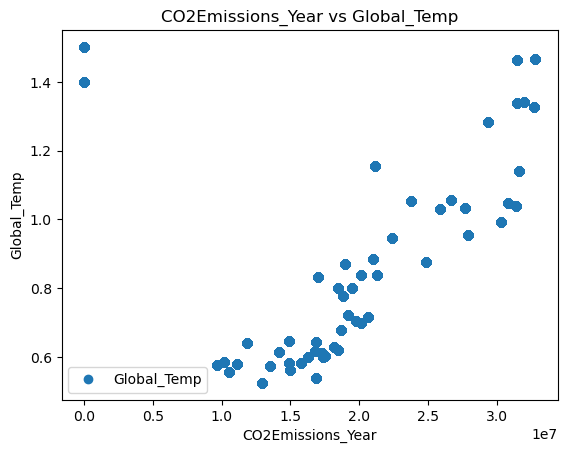

In [150]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'CO2Emissions_Year', y='Global_Temp', style='o')  
plt.title('CO2Emissions_Year vs Global_Temp')  
plt.xlabel('CO2Emissions_Year')  
plt.ylabel('Global_Temp')  
plt.show()

In [151]:
# Reshape again.

X_2 = df_test['CO2Emissions_Year'].values.reshape(-1,1)
y_2 = df_test['Global_Temp'].values.reshape(-1,1)

In [152]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [153]:
# Run and fit the regression.

regression_carbon_temp = LinearRegression()  
regression_carbon_temp.fit(X_train_2, y_train_2)

LinearRegression()

In [154]:
# Predict.

y_predicted_2 = regression_carbon_temp.predict(X_test_2)

In [155]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [156]:
print('Slope:' ,regression_carbon_temp.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.85166728e-08]]
Mean squared error:  0.05950587791845361
R2 score:  0.24551410833561238


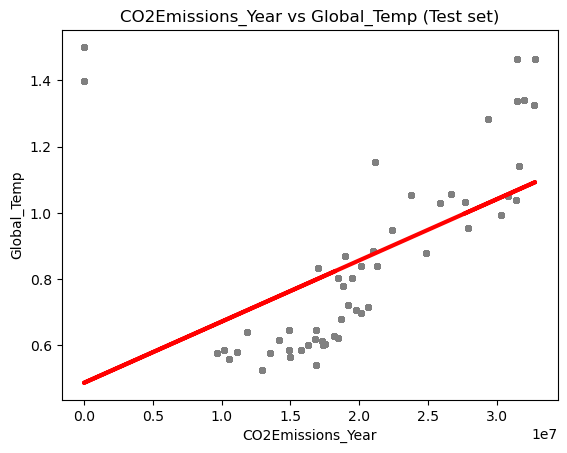

In [157]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('CO2Emissions_Year vs Global_Temp (Test set)')
plot_test.xlabel('CO2Emissions_Year')
plot_test.ylabel('Global_Temp')
plot_test.show()

In [158]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head()

,Actual,Predicted
0,0.628333,0.822004
1,1.398135,0.485318
2,0.639846,0.704394
3,0.721635,0.840168
4,1.284567,1.029249


Comment:
- The regression analysis on the data revealed a positive but very weak correlation between 'CO2 Emissions per Year' and 'Global Temperature' with a slope coefficient of approximately 3E-8 which suggests that, on average, global temperature increases by 3e-8 degrees Celsius for each kiloton of CO2 emitted. The MSE of approximately 0.026 indicates a moderate deviation between predicted and actual temperature values. The R2 score of 0.56 implies that 56% of the variance in global temperature can be explained by 'CO2 Emissions per Year'.
- After removing outliers, the relationship strengthened, as indicated by the increased slope coefficient of approximately 3.12E-8. The R2 score significantly improved, indicating that about 60% of the variance in global temperature can be attributed to 'CO2 Emissions per Year' after outlier removal. The substantially reduced MSE of approximately 0.024 signifies an improved fit, with the model closely aligning with the actual data points.